Experimenting with the hsl_to_rgb routines <br>
<br> 
Modified    By    Reason <br> 
--------    ---   ------ <br>
13-Aug-23   CBL   Original <br> 
<hr> 
References: <br> 
https://pythonfordesigners.com/tutorials/hsl-color-wheel/ <br>
https://stackoverflow.com/questions/31940285/plot-a-polar-color-wheel-based-on-a-colormap-using-python-matplotlib <br>
<hr>

In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from   matplotlib.colors import hsv_to_rgb
import colorsys as cs
import matplotlib.colors as mcolors

In [28]:
FULL_CIRCLE = 360

for angle in range(FULL_CIRCLE):
    hue = angle / FULL_CIRCLE
    print(f'{angle} / {FULL_CIRCLE} = {hue:.3f}')

0 / 360 = 0.000
1 / 360 = 0.003
2 / 360 = 0.006
3 / 360 = 0.008
4 / 360 = 0.011
5 / 360 = 0.014
6 / 360 = 0.017
7 / 360 = 0.019
8 / 360 = 0.022
9 / 360 = 0.025
10 / 360 = 0.028
11 / 360 = 0.031
12 / 360 = 0.033
13 / 360 = 0.036
14 / 360 = 0.039
15 / 360 = 0.042
16 / 360 = 0.044
17 / 360 = 0.047
18 / 360 = 0.050
19 / 360 = 0.053
20 / 360 = 0.056
21 / 360 = 0.058
22 / 360 = 0.061
23 / 360 = 0.064
24 / 360 = 0.067
25 / 360 = 0.069
26 / 360 = 0.072
27 / 360 = 0.075
28 / 360 = 0.078
29 / 360 = 0.081
30 / 360 = 0.083
31 / 360 = 0.086
32 / 360 = 0.089
33 / 360 = 0.092
34 / 360 = 0.094
35 / 360 = 0.097
36 / 360 = 0.100
37 / 360 = 0.103
38 / 360 = 0.106
39 / 360 = 0.108
40 / 360 = 0.111
41 / 360 = 0.114
42 / 360 = 0.117
43 / 360 = 0.119
44 / 360 = 0.122
45 / 360 = 0.125
46 / 360 = 0.128
47 / 360 = 0.131
48 / 360 = 0.133
49 / 360 = 0.136
50 / 360 = 0.139
51 / 360 = 0.142
52 / 360 = 0.144
53 / 360 = 0.147
54 / 360 = 0.150
55 / 360 = 0.153
56 / 360 = 0.156
57 / 360 = 0.158
58 / 360 = 0.161
59 / 36

In [22]:
### Variables
hue = 120/360
saturation = 80/100
luminosity = 60/100

### Instructions
clr = cs.hls_to_rgb(hue, luminosity, saturation)
print(clr)

(0.28, 0.9199999999999999, 0.28)


[]

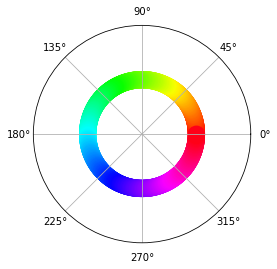

In [23]:
xval = np.arange(0, 2*np.pi, 0.01)
yval = np.ones_like(xval)

colormap = plt.get_cmap('hsv')
norm = mpl.colors.Normalize(0.0, 2*np.pi)

ax = plt.subplot(1, 1, 1, polar=True)
ax.scatter(xval, yval, c=xval, s=300, cmap=colormap, norm=norm, linewidths=0)
ax.set_yticks([])

In [24]:
# hls_to_rgb in colorsys doesn't work for vectors, lets see if we can massage that. 
def bad_hls_to_rgb(h, l, s):
    # Assume they are all the same length. 
    # allocate return array
    rgb = np.zeros(len(h))
    
    # replace all rgb where s = 0 with l.
    i = np.where(s==0)
    if (len(s)>0):
        return l, l, l
    if l <= 0.5:
        m2 = l * (1.0+s)
    else:
        m2 = l+s-(l*s)
    m1 = 2.0*l - m2
    return (_v(m1, m2, h+ONE_THIRD), _v(m1, m2, h), _v(m1, m2, h-ONE_THIRD))


In [34]:
def my_hls_to_rgb(h,l,s):
    # Assume they are all the same length. 
    # allocate return array
    rgb = np.zeros([len(h),3])
    for i in range(len(h)):
        rgb[i] = cs.hls_to_rgb(h[i],l[i],s[i])
    return rgb

In [35]:
hue        = np.arange(0,360,90)/360
saturation = np.arange(0.6, 1.0, 0.1)
luminosity = np.arange(0.4,0.8, 0.1)

### Instructions
clr = my_hls_to_rgb(hue, luminosity, saturation)
print(clr)

[[0.64 0.16 0.16]
 [0.5  0.85 0.15]
 [0.28 0.92 0.92]
 [0.7  0.43 0.97]]


In [33]:
a = np.arange(0,5,1)
i = np.where(a==0)
print(a[i])

[0]
